# Import and Clean

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

/kaggle/input/mytask/Data analyst Task.csv


In [2]:
snapp=pd.read_csv("/kaggle/input/mytask/Data analyst Task.csv") 

In [3]:
data=snapp.copy()

In [4]:
data.shape

(29057, 6)

In [5]:
data.head(10)

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
5,6,6,1/1/2022,0,NaN,10000
6,7,7,1/1/2022,0,NaN,29500
7,8,8,1/1/2022,10000,1.0,10000
8,9,9,1/1/2022,0,NaN,5000
9,10,10,1/1/2022,0,NaN,35000


In [6]:
data.discount_type.unique()

array([ 1., nan,  2.])

In [7]:
data.discount_type[data.discount_cost==0].isna().all()
#this shows that through the whole dataset, where there's no discount, discount_type value is Nan
#So I'll replace all the Nan values in this column with 0, discount_type=0 means no discount.

True

In [8]:
data.discount_type.fillna(0,inplace=True)

In [9]:
data.isna().sum()

order_id         0
user_id          0
created_at       0
discount_cost    0
discount_type    0
basket           0
dtype: int64

In [10]:
data.created_at.value_counts() #format of date is American, MM/DD/YYYY

7/1/2022      304
7/15/2022     275
7/22/2022     271
6/17/2022     255
6/24/2022     249
             ... 
1/2/2022       36
4/2/2022       32
5/9/2021        2
11/10/2021      2
4/12/2021       1
Name: created_at, Length: 215, dtype: int64

In [11]:
data['created_at'] = pd.to_datetime(data['created_at']) #I'll cast the data type to datetime for easier processing

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       29057 non-null  int64         
 1   user_id        29057 non-null  int64         
 2   created_at     29057 non-null  datetime64[ns]
 3   discount_cost  29057 non-null  int64         
 4   discount_type  29057 non-null  float64       
 5   basket         29057 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.3 MB


In [13]:
data.user_id.nunique() #there are 9985 unique users

9985

# Q1
1. We want to calculate the retention rate, in the next month after the first purchase:

1. Finding the number of new users in each month

1. Finding how many users purchase something else in the consecutive months
 
1. Finding the retention rate

1. Using mean retention rate for cohort_period=2 (second consecutive month of purchasing) and first purchasers in July to estimate the August retention number

1. After finding the approximate number of users in August, we find on average how many purchases users make in their second consecutive purchasing

1. Final result would be the number of users retained in August * average number of purchasing for people with 2 consecutive purchasing months

In [14]:
#a function to return the month and year
def get_month(x): return dt.datetime(x.year, x.month, 1) 

In [15]:
#since datetime can't directy be applied to a series, we need to use apply
data['purchase_month'] = data['created_at'].apply(get_month)

In [16]:
data.head(10)

,order_id,user_id,created_at,discount_cost,discount_type,basket,purchase_month
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01
1,2,2,2021-05-09,0,0.0,20000,2021-05-01
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01
3,4,4,2021-11-10,0,0.0,15000,2021-11-01
4,5,5,2021-11-10,10000,1.0,16000,2021-11-01
5,6,6,2022-01-01,0,0.0,10000,2022-01-01
6,7,7,2022-01-01,0,0.0,29500,2022-01-01
7,8,8,2022-01-01,10000,1.0,10000,2022-01-01
8,9,9,2022-01-01,0,0.0,5000,2022-01-01
9,10,10,2022-01-01,0,0.0,35000,2022-01-01


In [17]:
#adding a column that indicates the first purchase month for each user
data['first_purchase']=data.groupby('user_id')['purchase_month'].transform('min')

In [18]:
#testing to see if it worked properly
data[data.user_id==3]

,order_id,user_id,created_at,discount_cost,discount_type,basket,purchase_month,first_purchase
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01,2021-05-01
7712,7713,3,2022-03-28,0,0.0,18000,2022-03-01,2021-05-01
26085,26086,3,2022-07-17,0,0.0,18000,2022-07-01,2021-05-01
26302,26303,3,2022-07-18,0,0.0,13500,2022-07-01,2021-05-01


In [19]:
#this indicates the nth month of joining/starting to purchase, we start with 1 for convenience
data['cohort_period']=12*((data['purchase_month'].dt.year)-(data['first_purchase'].dt.year))+((data['purchase_month'].dt.month)-(data['first_purchase'].dt.month)+1)

In [20]:
#testing to see if it worked properly
data[data.user_id==3]

,order_id,user_id,created_at,discount_cost,discount_type,basket,purchase_month,first_purchase,cohort_period
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01,2021-05-01,1
7712,7713,3,2022-03-28,0,0.0,18000,2022-03-01,2021-05-01,11
26085,26086,3,2022-07-17,0,0.0,18000,2022-07-01,2021-05-01,15
26302,26303,3,2022-07-18,0,0.0,13500,2022-07-01,2021-05-01,15


In [21]:
# we want to see how many UNIQUE users have purchased something in consecutive months, grouped based on their first purchase
#and the period in which they were consecutively active.

users_per_month=data.groupby(['first_purchase', 'cohort_period'])['user_id'].nunique().reset_index()
users_per_month.head(15)

,first_purchase,cohort_period,user_id
0,2021-04-01,1,1
1,2021-04-01,12,1
2,2021-04-01,14,1
3,2021-05-01,1,2
4,2021-05-01,11,1
5,2021-05-01,14,1
6,2021-05-01,15,1
7,2021-11-01,1,2
8,2021-11-01,3,1
9,2021-11-01,5,1


In [22]:
# Now we should create a pivot table to make creating a heatmap easier
retention = users_per_month.pivot(index='first_purchase',
                                 columns ='cohort_period',
                                 values = 'user_id')
retention

cohort_period,1,2,3,4,5,6,7,11,12,14,15
first_purchase,,,,,,,,,,,
2021-04-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2021-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2021-11-01,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,1491.0,457.0,365.0,378.0,316.0,317.0,324.0,NaN,NaN,NaN,NaN
2022-02-01,1539.0,385.0,393.0,362.0,354.0,337.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,1255.0,305.0,274.0,259.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,1592.0,421.0,389.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,1192.0,352.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,1396.0,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#now we need to calculate the retention rate
retention_prcnt = retention.divide(retention[1], axis=0)
retention_prcnt.round(3)*100

cohort_period,1,2,3,4,5,6,7,11,12,14,15
first_purchase,,,,,,,,,,,
2021-04-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN
2021-05-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,50.0,50.0
2021-11-01,100.0,NaN,50.0,NaN,50.0,50.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,100.0,30.7,24.5,25.4,21.2,21.3,21.7,NaN,NaN,NaN,NaN
2022-02-01,100.0,25.0,25.5,23.5,23.0,21.9,NaN,NaN,NaN,NaN,NaN
2022-03-01,100.0,24.3,21.8,20.6,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,100.0,26.4,24.4,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,100.0,29.5,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,100.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
retention_prcnt.index=retention_prcnt.index.strftime('%Y-%m')

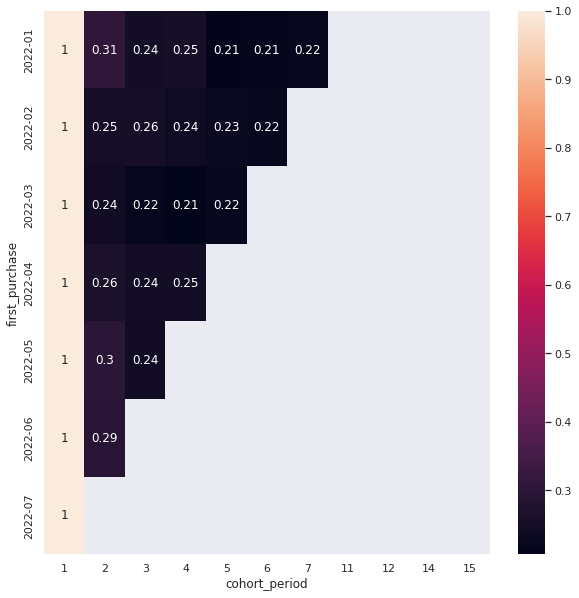

In [25]:
g=sns.set(rc={'figure.figsize':(10,10)})
g=sns.heatmap(data=retention_prcnt.iloc[3:,:],annot=True)

Now, how many purchases would that be? we need to find the average number of purchasing for cohort_period of 2, meaning that, on average how many purchases people have in the next month after their initial purchase

In [26]:
mean_retention_percentage=retention_prcnt[2].mean()

In [27]:
first_prch_July=retention.loc['2022-07-01',1]*mean_retention_percentage

In [28]:
first_prch_July #so around 417 customers who first purchased in July, are going to purchase something in August

416.51387354993096

So we probably will have around 416 users in August who had their first purchase in July.
We want the number of purchases in August, so we need to know on average, how many purchases are made in the second month, by people who purchased something for the first time in the previous month.

In [29]:
#this data is heavily skewed so we calculate the median instead of the mean
data[data.cohort_period==2].groupby(['user_id']).size().median()

1.0

So probably around 417 purchases will be made in August

## Q2
What we'll do for this section is:

1.  divide users into 3 groups based on the discount they received on their first purchase
1.  calculate retention rate for each group and see how first purchase discount affects user retention

In [30]:
data[data.discount_type!=0].cohort_period.value_counts(normalize=True)
#discounts are not just for first time purchasers, but here we want to examine the effect of
#discounts on the first purchasers

1    0.697329
2    0.113069
3    0.077545
4    0.045632
5    0.031769
6    0.023249
7    0.011408
Name: cohort_period, dtype: float64

In [31]:
data.discount_type.value_counts(normalize=True)

0.0    0.761675
1.0    0.233575
2.0    0.004749
Name: discount_type, dtype: float64

In [32]:
data.groupby('discount_type')['discount_cost'].mean()

discount_type
0.0        0.000000
1.0    10595.093561
2.0     5749.565217
Name: discount_cost, dtype: float64

In [33]:
first_prch=data.groupby('user_id')['order_id'].min() #finding the smallest order_id, which would be the first purchase

In [34]:
first_prch

user_id
1           1
2           2
3           3
4           4
5           5
        ...  
9981    29031
9982    29034
9983    29036
9984    29039
9985    29054
Name: order_id, Length: 9985, dtype: int64

In [35]:
#unique user ids with discount type 0 in their first purchase
disc0=data.user_id[(data.discount_type==0)&(data.order_id.isin(first_prch))].unique()

In [36]:
#unique user ids with discount type 1 in their first purchase
disc1=data.user_id[(data.discount_type==1)&(data.order_id.isin(first_prch))].unique()

In [37]:
#unique user ids with discount type 2 in their first purchase
disc2=data.user_id[(data.discount_type==2)&(data.order_id.isin(first_prch))].unique()

In [38]:
def retention_rate(df):
    users_per_month=df.groupby(['first_purchase', 'cohort_period'])['user_id'].nunique().reset_index()
    retention = users_per_month.pivot(index='first_purchase',
                                 columns ='cohort_period',
                                 values = 'user_id')
    retention_prcnt = retention.divide(retention[1], axis=0)
    retention_prcnt.index=retention_prcnt.index.strftime('%Y-%m')
    g=sns.set(rc={'figure.figsize':(10,10)})
    g=sns.heatmap(data=retention_prcnt,annot=True,cmap='Pastel1')
    return g

<AxesSubplot:xlabel='cohort_period', ylabel='first_purchase'>

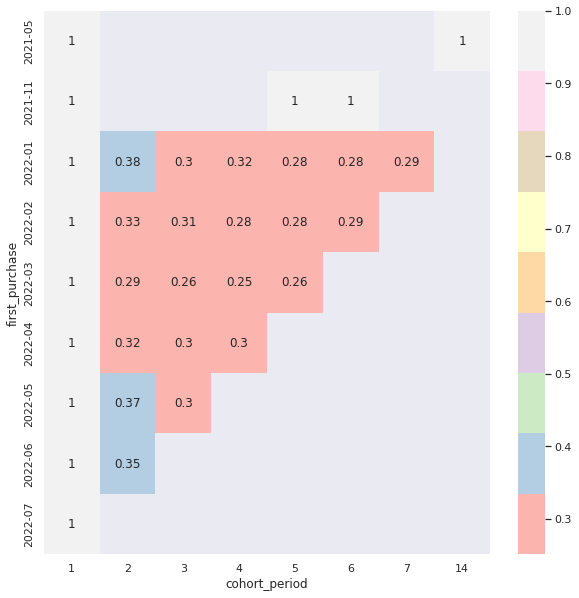

In [39]:
#discount type 0 for the first purchase retention rate
retention_rate(data[data['user_id'].isin(disc0)])

<AxesSubplot:xlabel='cohort_period', ylabel='first_purchase'>

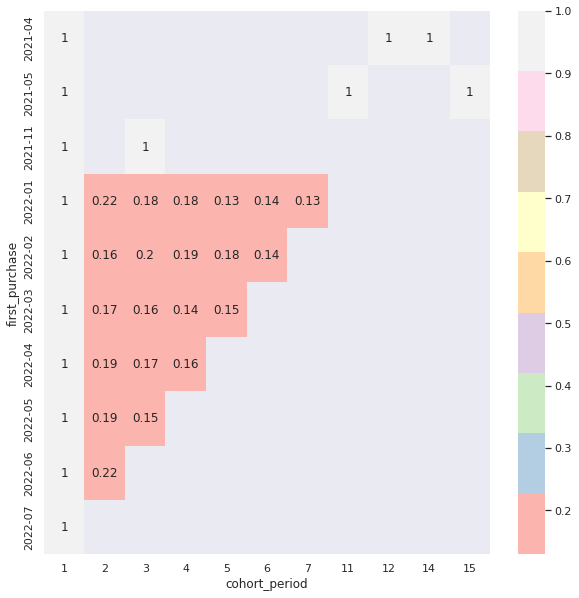

In [40]:
#discount type 1 for the first purchase retention rate
retention_rate(data[data['user_id'].isin(disc1)])

<AxesSubplot:xlabel='cohort_period', ylabel='first_purchase'>

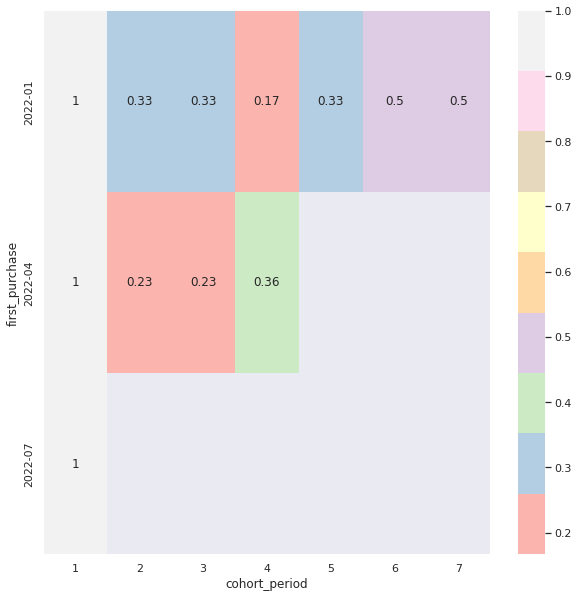

In [41]:
#discount type 2 for the first purchase retention rate
retention_rate(data[data['user_id'].isin(disc2)])

## Q3
1. Finding users with more than 1 purchase using value_count of user_id

1. Sorting the dataset accroding to user_id and cohort_period

1. Creating an interval column which is the difference between created_at column and created_at.shift(1) calculated in days

1. Creating a table using interval values for each user, the columns are the number of intervals (int_1= interval between first and second purchase, int2=interval between second and third purchase, so on). this table has 118 columns and 4444 rows (number of users with more than one purchase)

1. Finding the median value of each column (since columns are heavily skewed), this lets us know on average how long after each purchase, the user makes another purchase)

<AxesSubplot:>

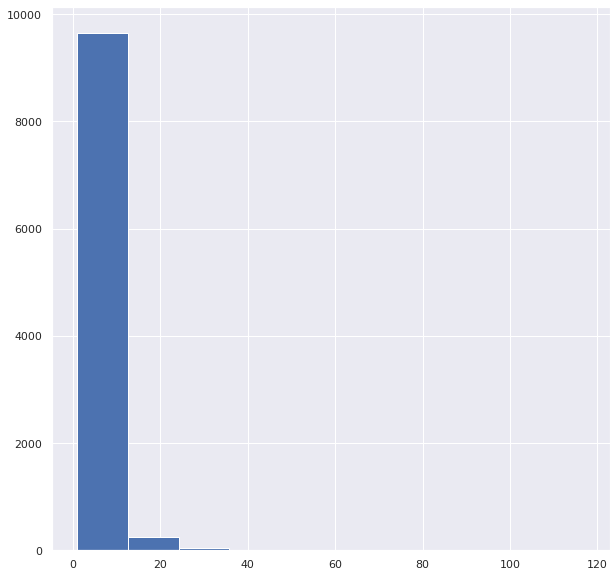

In [42]:
data.user_id.value_counts().hist()

In [43]:
data.user_id.value_counts()[data.user_id.value_counts()==1].shape #5541 out of 9985 users have purchase only once

(5541,)

In [44]:
multi_purchase=data.user_id.value_counts()[data.user_id.value_counts()>1] #4444 out of 9985 users have a second or more purchase

In [45]:
np.percentile(data.user_id.value_counts(),95) #95% of the users have purchased something 10 or less times

10.0

In [46]:
data.user_id.value_counts().describe() 

count    9985.000000
mean        2.910065
std         4.507908
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       117.000000
Name: user_id, dtype: float64

In [47]:
multi_data=data[data.user_id.isin(multi_purchase.index)] #filtering out the users with more than once purchase histor

In [48]:
multi_data=multi_data.sort_values(['user_id','cohort_period']) #sorting the data according to user_id and cohort_period so we can calculate intervals for each user easily

In [49]:
multi_data.head(20)

,order_id,user_id,created_at,discount_cost,discount_type,basket,purchase_month,first_purchase,cohort_period
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01,2021-04-01,1
7703,7704,1,2022-03-28,0,0.0,6400,2022-03-01,2021-04-01,12
7980,7981,1,2022-03-31,0,0.0,5000,2022-03-01,2021-04-01,12
13984,13985,1,2022-05-09,0,0.0,6800,2022-05-01,2021-04-01,14
1,2,2,2021-05-09,0,0.0,20000,2021-05-01,2021-05-01,1
17778,17779,2,2022-06-04,0,0.0,41000,2022-06-01,2021-05-01,14
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01,2021-05-01,1
7712,7713,3,2022-03-28,0,0.0,18000,2022-03-01,2021-05-01,11
26085,26086,3,2022-07-17,0,0.0,18000,2022-07-01,2021-05-01,15
26302,26303,3,2022-07-18,0,0.0,13500,2022-07-01,2021-05-01,15


In [50]:
multi_data_shift=multi_data.groupby('user_id').apply(lambda multi_data:(multi_data.created_at-multi_data.created_at.shift(1)).dt.days).reset_index() #calculating intervals between purchases for each group (each user)

In [51]:
multi_data_shift

,user_id,level_1,created_at
0,1,0,NaN
1,1,7703,350.0
2,1,7980,3.0
3,1,13984,39.0
4,2,1,NaN
...,...,...,...
23511,9915,28684,NaN
23512,9915,28842,0.0
23513,9915,28894,1.0
23514,9940,28831,NaN


In [52]:
multi_data_shift=multi_data_shift.rename(columns={'created_at':'interval'})

In [53]:
multi_data_shift.index=multi_data_shift.level_1

In [54]:
multi_data_shift.drop(columns='level_1',inplace=True)

In [55]:
multi_data_shift #after some adjusting, we have the intervals and indexes ready to join the main dataset for multiple purchase users

,user_id,interval
level_1,,
0,1,NaN
7703,1,350.0
7980,1,3.0
13984,1,39.0
1,2,NaN
...,...,...
28684,9915,NaN
28842,9915,0.0
28894,9915,1.0


In [56]:
multi_data=multi_data.join(multi_data_shift.interval)

In [57]:
multi_data.head(10)

,order_id,user_id,created_at,discount_cost,discount_type,basket,purchase_month,first_purchase,cohort_period,interval
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01,2021-04-01,1,NaN
7703,7704,1,2022-03-28,0,0.0,6400,2022-03-01,2021-04-01,12,350.0
7980,7981,1,2022-03-31,0,0.0,5000,2022-03-01,2021-04-01,12,3.0
13984,13985,1,2022-05-09,0,0.0,6800,2022-05-01,2021-04-01,14,39.0
1,2,2,2021-05-09,0,0.0,20000,2021-05-01,2021-05-01,1,NaN
17778,17779,2,2022-06-04,0,0.0,41000,2022-06-01,2021-05-01,14,391.0
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01,2021-05-01,1,NaN
7712,7713,3,2022-03-28,0,0.0,18000,2022-03-01,2021-05-01,11,323.0
26085,26086,3,2022-07-17,0,0.0,18000,2022-07-01,2021-05-01,15,111.0
26302,26303,3,2022-07-18,0,0.0,13500,2022-07-01,2021-05-01,15,1.0


In [58]:
intrvl=pd.DataFrame(multi_data.groupby('user_id')['interval'].apply(list)) #now we create a list for each user which has interval values in it
#this also resets the index

In [59]:
intrvl=pd.DataFrame(intrvl.interval.values.tolist()).add_prefix('inerval_') # expanding the lists so that each interval acts as a feature

In [60]:
intrvl.head(10)

,inerval_0,inerval_1,inerval_2,inerval_3,inerval_4,inerval_5,inerval_6,inerval_7,inerval_8,inerval_9,...,inerval_107,inerval_108,inerval_109,inerval_110,inerval_111,inerval_112,inerval_113,inerval_114,inerval_115,inerval_116
0,NaN,350.0,3.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,323.0,111.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,122.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4.0,6.0,3.0,45.0,47.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,53.0,21.0,7.0,13.0,53.0,55.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,136.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,30.0,1.0,0.0,5.0,1.0,41.0,11.0,10.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,13.0,11.0,13.0,3.0,3.0,4.0,2.0,11.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'inerval_1'}>,
        <AxesSubplot:title={'center':'inerval_2'}>,
        <AxesSubplot:title={'center':'inerval_3'}>],
       [<AxesSubplot:title={'center':'inerval_4'}>,
        <AxesSubplot:title={'center':'inerval_5'}>,
        <AxesSubplot:title={'center':'inerval_6'}>],
       [<AxesSubplot:title={'center':'inerval_7'}>,
        <AxesSubplot:title={'center':'inerval_8'}>,
        <AxesSubplot:title={'center':'inerval_9'}>],
       [<AxesSubplot:title={'center':'inerval_10'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

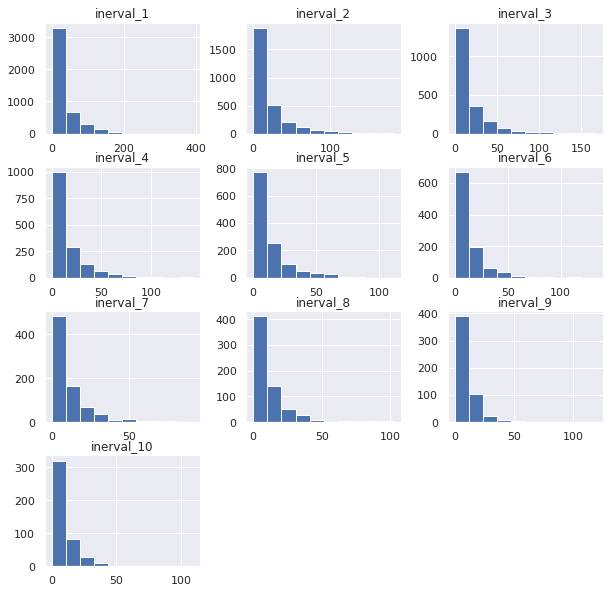

In [61]:
intrvl.iloc[:,1:11].hist() #since data is skewed, we'll use median instead of mean to gauge the average intervals between purchases

In [62]:
interval_median=np.nanmedian(intrvl.iloc[:,1:11],axis=0) 
#to ignore nan values when calculating mean, we use nanmean
#since 95% of users have 10 or under number of purchases, we cut the intrvl dataset
#the first column is always nan, so we can ignore it

In [63]:
interval_median

array([16., 12., 10.,  9.,  8.,  8.,  7.,  7.,  6.,  6.])

In [64]:
intrvl.iloc[:,1:11].columns

Index(['inerval_1', 'inerval_2', 'inerval_3', 'inerval_4', 'inerval_5',
       'inerval_6', 'inerval_7', 'inerval_8', 'inerval_9', 'inerval_10'],
      dtype='object')

In [65]:
intvl_plot=pd.DataFrame(data=interval_median,index=intrvl.iloc[:,1:11].columns,columns=['Median Interval in Days'])

<AxesSubplot:>

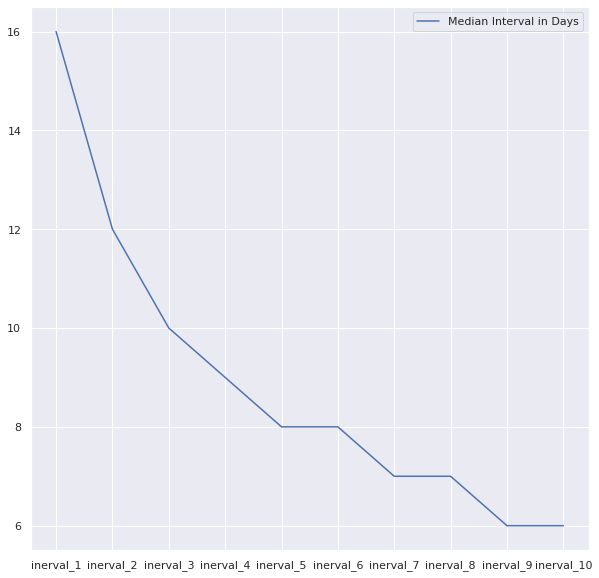

In [66]:
sns.lineplot(data=intvl_plot)

the reult above shows that as we go forward in intervals, median of the intervals decrease, so the more times someone buys the sooner they are going to come back and buy something else.

**Note that interval unit is day**